In [17]:
import pandas as pd

archivo = 'DATOS_IVE_2018_2020.xlsx'
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
from datetime import datetime

df = pd.read_excel(archivo)
df = df.infer_objects()

In [18]:
df = df.set_index('id')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 1 to 2190
Data columns (total 75 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   causal                                             2190 non-null   int64         
 1   mes_de_concurrencia                                2182 non-null   float64       
 2   Año_concurrencia                                   2190 non-null   int64         
 3   nacionalidad                                       2190 non-null   object        
 4   país_origen                                        2190 non-null   object        
 5   edad_mujer                                         2160 non-null   float64       
 6   previsión_salud                                    2190 non-null   object        
 7   pueblo_originario                                  2190 non-null   object        
 8   Servicio_Salud_o_S

In [20]:
df.head(6)

,causal,mes_de_concurrencia,Año_concurrencia,nacionalidad,país_origen,edad_mujer,previsión_salud,pueblo_originario,Servicio_Salud_o_SEREMI,establecimiento,...,VISITA7,VISITA8,VISITA9,VISITA10,n° consultas con Psicólogo,n° consultas con Asistente Social,n° consultas con Dupla,n° consultas con Psiquiatra,n° visitas domiciliarias,total de consultas de acompañamiento
id,,,,,,,,,,,,,,,,,,,,,
1,1,2.0,2018,CHILE,CHILE,30.0,FONASA,sin informacion,Servicio de Salud Araucania Sur,Hospital Dr. Hernan Henriquez Aravena (Temuco),...,0,0,0,0,9,0,2,1,0,12
2,1,3.0,2018,VENEZUELA,VENEZUELA,28.0,FONASA,sin informacion,Servicio de Salud Metropolitano Central,Hospital Clinico San Borja,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,2018,ARGENTINA,ARGENTINA,42.0,FONASA,sin informacion,Servicio de Salud Viña del Mar Quillota,Hospital Dr. Gustavo Fricke (Viña del Mar),...,0,0,0,0,2,0,0,1,0,3
4,1,1.0,2018,CHILE,CHILE,31.0,FONASA,sin informacion,Servicio de Salud Biobio,Complejo Asistencial Dr. Victor Rios Ruiz (Los...,...,0,0,0,0,0,0,0,0,0,0
5,1,3.0,2018,CHILE,CHILE,31.0,FONASA,sin informacion,Servicio de Salud Iquique,Hospital Dr. Ernesto Torres Galdames (Iquique),...,0,0,0,0,0,0,3,0,0,3
6,1,2.0,2018,CHILE,CHILE,32.0,FONASA,sin informacion,Servicio de Salud Metropolitano Central,Hospital Clinico Metropolitano El Carmen Docto...,...,0,0,0,0,4,0,0,0,0,4


In [28]:
df=df["edad_mujer"].groupby(df["comuna_residencia"]).mean()

KeyError: 'edad_mujer'

In [27]:
df

país_origen
ARGENTINA               34.666667
AUSTRALIA               38.000000
BOLIVIA                 27.888889
BRASIL                  39.500000
CHILE                   29.312465
COLOMBIA                30.500000
CUBA                    35.000000
DESCONOCIDO             32.342857
DOMiNICA                34.000000
ECUADOR                 29.666667
ESPAÑA                  35.000000
ESTADOS UNIDOS          28.000000
HAITI                   30.072165
ISRAEL                  23.000000
ITALIA                  34.000000
PARAGUAY                25.000000
PERU                    29.791667
REPUBLICA DOMINICANA    27.666667
RUSIA                   33.000000
SUIZA                   36.000000
TAIWAN                  33.000000
URUGUAY                 33.000000
VANUATU                 24.000000
VENEZUELA               29.111111
VIETNAM                 35.000000
Name: edad_mujer, dtype: float64

In [6]:
df.drop(df[df.mes_de_concurrencia.isnull()].index, inplace = True)

In [7]:
df.shape

(2182, 75)

In [8]:
df.drop(df[df.edad_mujer.isnull()].index, inplace = True)

In [9]:
df.shape

(2153, 75)

In [10]:
df.drop(df[df.edad_gestacional_concurrencia.isnull()].index, inplace = True)

In [107]:
df.shape

(2108, 75)

In [108]:
df.drop(df[df.fecha_concurrencia.isnull()].index, inplace = True)

In [109]:
df.shape

(2108, 75)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 1 to 2190
Data columns (total 75 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   causal                                             2108 non-null   int64         
 1   mes_de_concurrencia                                2108 non-null   float64       
 2   Año_concurrencia                                   2108 non-null   int64         
 3   nacionalidad                                       2108 non-null   object        
 4   país_origen                                        2108 non-null   object        
 5   edad_mujer                                         2108 non-null   float64       
 6   previsión_salud                                    2108 non-null   object        
 7   pueblo_originario                                  2108 non-null   object        
 8   Servicio_Salud_o_S

In [111]:
df = df.fillna('sin información')

In [112]:
df["mes_de_concurrencia"] = df["mes_de_concurrencia"].astype(int)

In [113]:
df["edad_mujer"] = df["edad_mujer"].astype(int)

In [114]:
df["edad_gestacional_concurrencia"] = df["edad_gestacional_concurrencia"].astype(int)

In [115]:
dam= df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,69,70,71,72,73,74]] 

In [116]:
dam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 1 to 2190
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   causal                                             2108 non-null   int64         
 1   mes_de_concurrencia                                2108 non-null   int64         
 2   Año_concurrencia                                   2108 non-null   int64         
 3   nacionalidad                                       2108 non-null   object        
 4   país_origen                                        2108 non-null   object        
 5   edad_mujer                                         2108 non-null   int64         
 6   previsión_salud                                    2108 non-null   object        
 7   pueblo_originario                                  2108 non-null   object        
 8   Servicio_Salud_o_S

In [117]:
dam.columns = ['causal','mes_concurrencia','Año_concurrencia','nacionalidad',
	'país_origen',	'edad_mujer',	'previsión_salud',	'pueblo_originario',
  	'Servicio_Salud_SEREMI',	'establecimiento'	,'tipo_establecimiento',	'Región_residencia',
    	'comuna_residencia',	'nivel_atencion_primer_contacto_sistema_salud',
      'fecha_concurrencia','edad_gestacional_concurrencia',	'Decisión_mujer_sobre_su_embarazo',
      	'Complicaciones_post-IVE','decisión_sobre_acompañamiento_psicosocial'	,'n°_consultas_con_Psicólogo',
        	'n°_consultas_con_Asistente_Social'	,'n°_consultas_con_Dupla',	'n°_consultas_con_Psiquiatra_n°' ,
          'n°_visitas_domiciliarias',	'total_consultas_acompañamiento']

In [118]:
dam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 1 to 2190
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   causal                                        2108 non-null   int64         
 1   mes_concurrencia                              2108 non-null   int64         
 2   Año_concurrencia                              2108 non-null   int64         
 3   nacionalidad                                  2108 non-null   object        
 4   país_origen                                   2108 non-null   object        
 5   edad_mujer                                    2108 non-null   int64         
 6   previsión_salud                               2108 non-null   object        
 7   pueblo_originario                             2108 non-null   object        
 8   Servicio_Salud_SEREMI                         2108 non-null   object

In [119]:
p=[]
p.append(dam[dam['edad_mujer']<18]['edad_mujer'].count())
p.append(dam[(dam['edad_mujer']>=18) & (dam['edad_mujer']<28)]['edad_mujer'].count())
p.append(dam[(dam['edad_mujer']>=28) & (dam['edad_mujer']<38)]['edad_mujer'].count())
p.append(dam[(dam['edad_mujer']>=38) & (dam['edad_mujer']<=48)]['edad_mujer'].count())    
p

[159, 676, 928, 345]

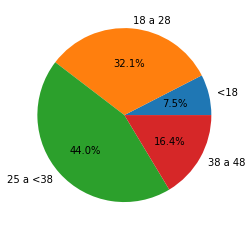

In [120]:
plt.pie(p, labels=('<18', '18 a 28', '25 a <38', '38 a 48'),autopct='%1.1f%%')
plt.show()

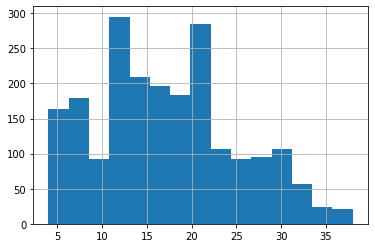

In [121]:
dam['edad_gestacional_concurrencia'].hist(bins=15)
plt.show()

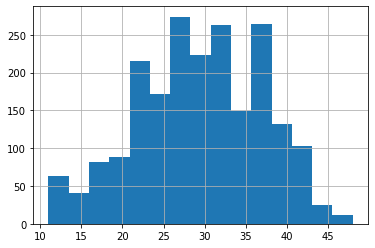

In [122]:
dam['edad_mujer'].hist(bins=15)
plt.show()

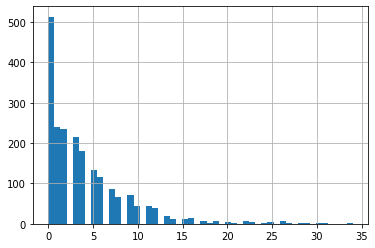

In [123]:
dam['total_consultas_acompañamiento'].hist(bins=50)
plt.show()

In [124]:
fig = px.violin(dam, y="edad_gestacional_concurrencia",box=True,color="causal")
fig.show()

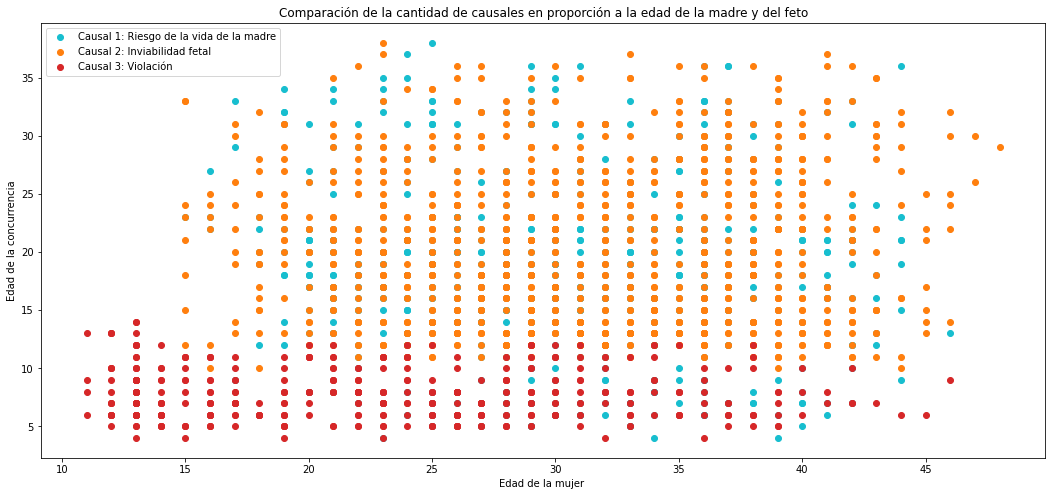

In [126]:
plt.figure(figsize=(18, 8))
sd1 = dam[(dam['causal']>=1) & (dam['causal']<=1)][['edad_mujer','edad_gestacional_concurrencia']]
sd2 = dam[(dam['causal']>=2) & (dam['causal']<=2)][['edad_mujer','edad_gestacional_concurrencia']]
sd3 = dam[(dam['causal']>=3) & (dam['causal']<=3)][['edad_mujer','edad_gestacional_concurrencia']]


plt.scatter(sd1['edad_mujer'], sd1['edad_gestacional_concurrencia'], c='C9',label='Causal 1: Riesgo de la vida de la madre')
plt.scatter(sd2['edad_mujer'], sd2['edad_gestacional_concurrencia'], c='C1',label='Causal 2: Inviabilidad fetal' )
plt.scatter(sd3['edad_mujer'], sd3['edad_gestacional_concurrencia'], c='C3',label='Causal 3: Violación')

plt.xlabel("Edad de la mujer ")
plt.ylabel('Edad de la concurrencia')
plt.title("Comparación de la cantidad de causales en proporción a la edad de la madre y del feto")
plt.legend(loc='best')
plt.show()

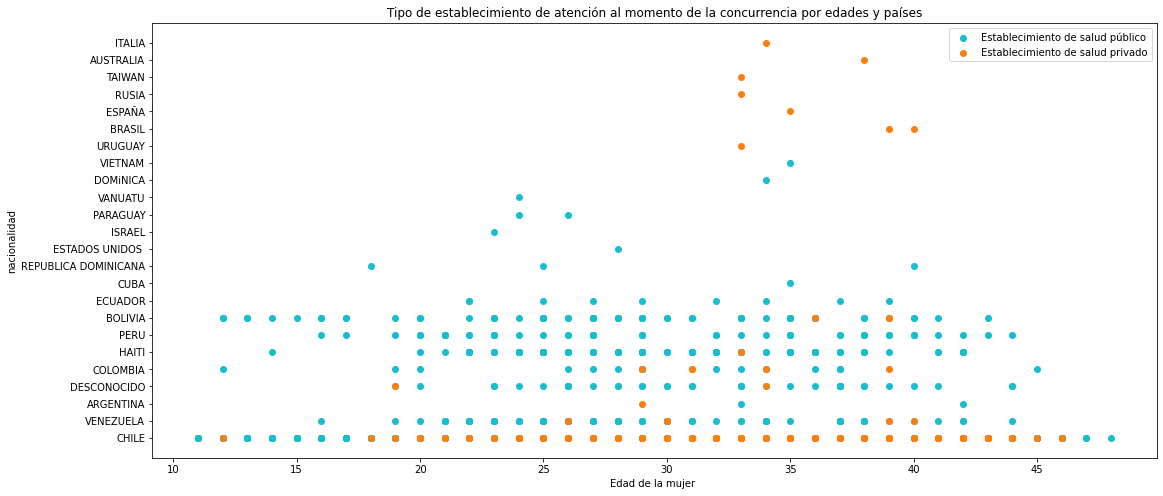

In [127]:
plt.figure(figsize=(18, 8))
sd1 = dam[(dam['tipo_establecimiento']>=1) & (dam['tipo_establecimiento']<=1)][['edad_mujer','nacionalidad']]
sd2 = dam[(dam['tipo_establecimiento']>=2) & (dam['tipo_establecimiento']<=2)][['edad_mujer','nacionalidad']]


plt.scatter(sd1['edad_mujer'], sd1['nacionalidad'], c='C9',label='Establecimiento de salud público')
plt.scatter(sd2['edad_mujer'], sd2['nacionalidad'], c='C1',label='Establecimiento de salud privado' )
plt.xlabel("Edad de la mujer ")
plt.ylabel('nacionalidad')
plt.title("Tipo de establecimiento de atención al momento de la concurrencia por edades y países")
plt.legend(loc='best')
plt.show()

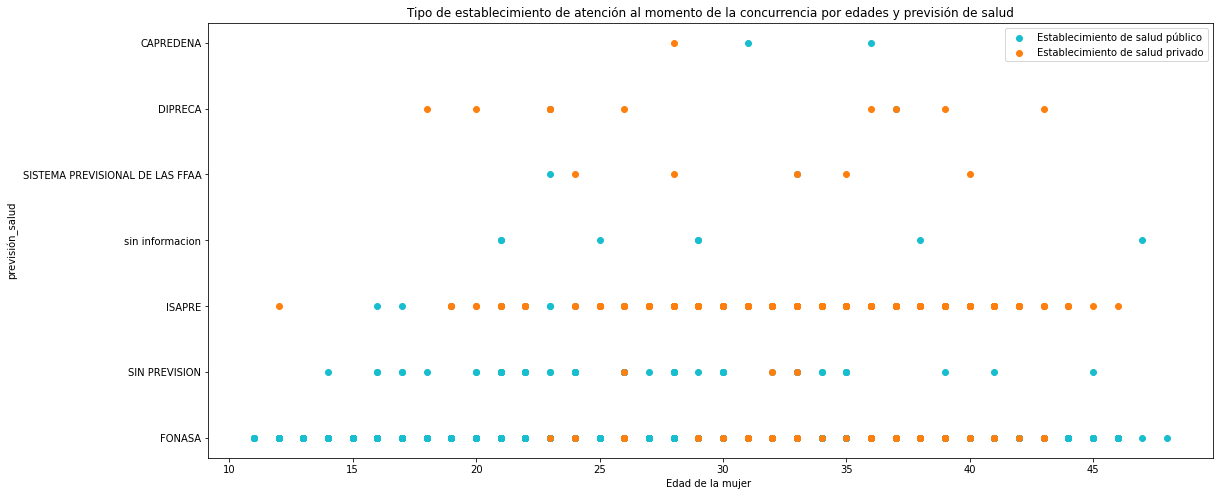

In [128]:
plt.figure(figsize=(18, 8))
sd1 = dam[(dam['tipo_establecimiento']>=1) & (dam['tipo_establecimiento']<=1)][['edad_mujer','previsión_salud']]
sd2 = dam[(dam['tipo_establecimiento']>=2) & (dam['tipo_establecimiento']<=2)][['edad_mujer','previsión_salud']]


plt.scatter(sd1['edad_mujer'], sd1['previsión_salud'], c='C9',label='Establecimiento de salud público')
plt.scatter(sd2['edad_mujer'], sd2['previsión_salud'], c='C1',label='Establecimiento de salud privado' )
plt.xlabel("Edad de la mujer ")
plt.ylabel('previsión_salud')
plt.title("Tipo de establecimiento de atención al momento de la concurrencia por edades y previsión de salud")
plt.legend(loc='best')
plt.show()

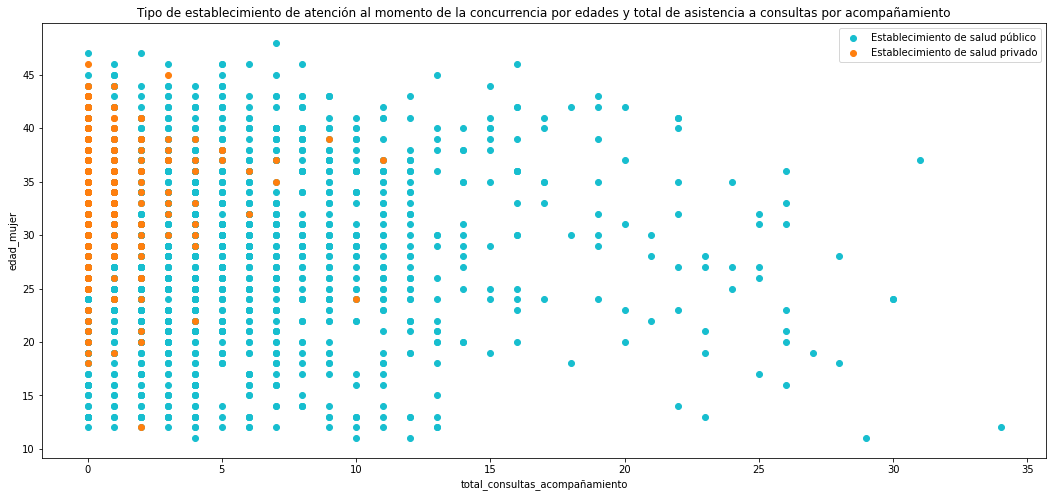

In [129]:
plt.figure(figsize=(18, 8))

sd1 = dam[(dam['tipo_establecimiento']>=1) & (dam['tipo_establecimiento']<=1)][['total_consultas_acompañamiento','edad_mujer']]
sd2 = dam[(dam['tipo_establecimiento']>=2) & (dam['tipo_establecimiento']<=2)][['total_consultas_acompañamiento','edad_mujer']]


plt.scatter(sd1['total_consultas_acompañamiento'], sd1['edad_mujer'], c='C9',label='Establecimiento de salud público')
plt.scatter(sd2['total_consultas_acompañamiento'], sd2['edad_mujer'], c='C1',label='Establecimiento de salud privado' )
plt.xlabel("total_consultas_acompañamiento")
plt.ylabel('edad_mujer')
plt.title("Tipo de establecimiento de atención al momento de la concurrencia por edades y total de asistencia a consultas por acompañamiento")
plt.legend(loc='best')

plt.show()





In [130]:
fig = px.scatter(dam, x="fecha_concurrencia", y="edad_mujer", color="causal")
fig.show()